# Lecure 8.2: linear regression and statistics continued

I was going to jump into netcdf files and doing data analysis with them, but decided it was more useful for your work to spend the time on digging in on model fitting. We will come back to netcdf files and climate data in the next two weeks

## Lecture:
    - Root mean square error (RMSE)
    - R^2, the "coefficient of determination"
    - training and testing spitting

### 8.2.1: Continue with what you were doing in Lec 8.1. Focus on the first exercises if you haven't done them yet

### 8.2.2 
Make a pairplot using the housing data: https://scipy-lectures.org/packages/statistics/index.html#pairplot-scatter-matrices

Explain what this tells you

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
from scipy import stats

In [22]:
#tutorial!, how to download boston data from sklearn
from sklearn import datasets
data = datasets.load_boston() 
df = pd.DataFrame(data.data, columns=data.feature_names) #this makes a new dataframe named df with pandas
# target (housing value -- MEDV) in new data frame named target
target = pd.DataFrame(data.target, columns=["MEDV"])

df["MEDV"] = target["MEDV"]# this adds means 

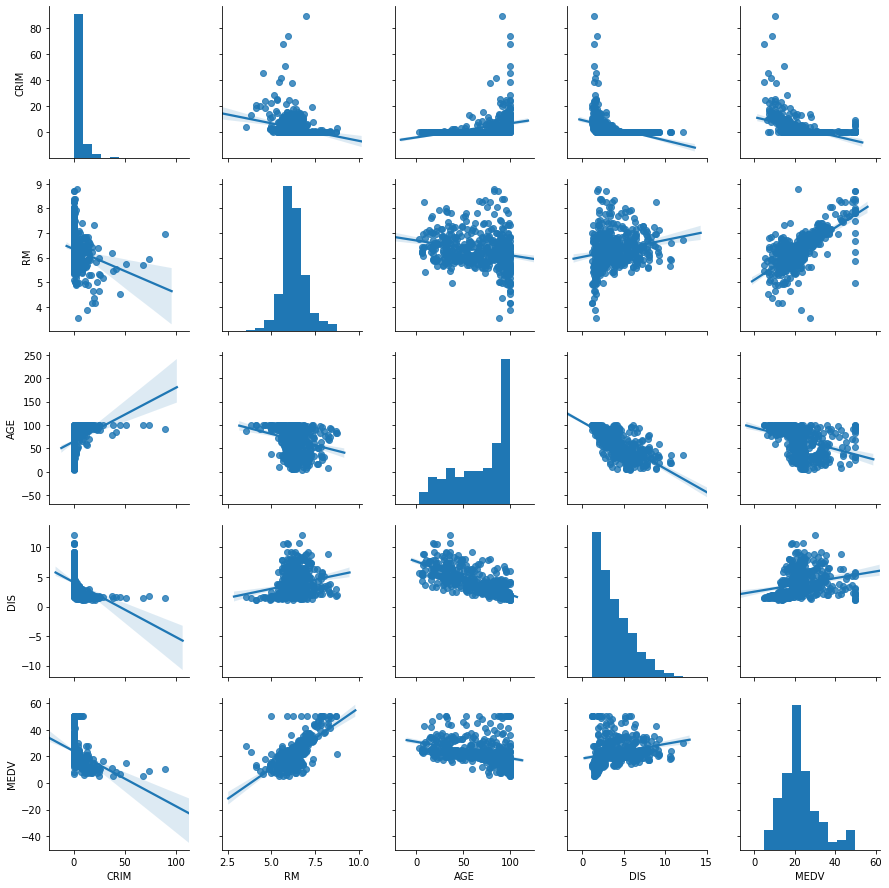

In [23]:
#scatter matrix 
sns.pairplot(df, vars=['CRIM', 'RM', 'AGE', 'DIS', 'MEDV'], kind = 'reg') #variables

In [24]:
df.dropna()#normalizing data? 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\baezj\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\baezj\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


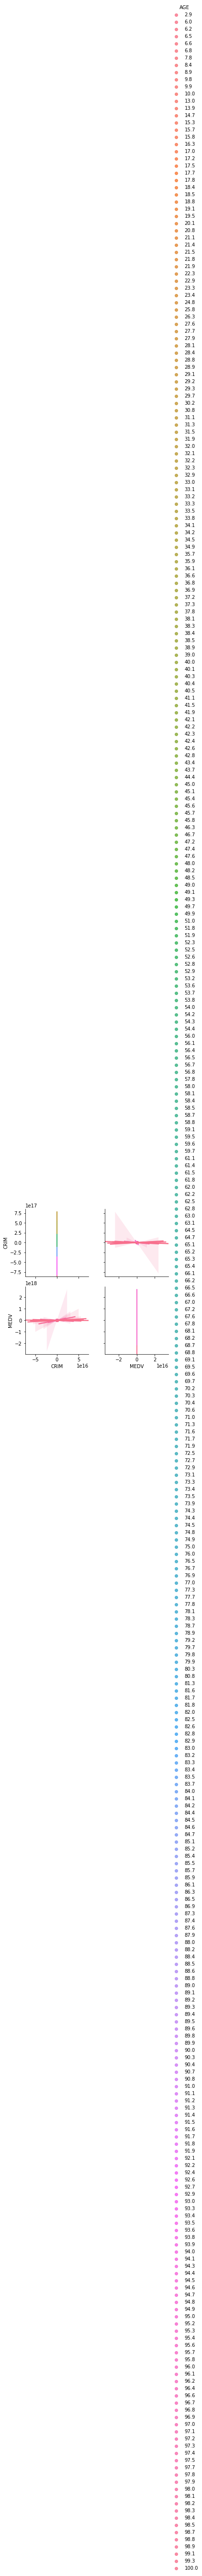

In [25]:
#scatter matrix 
sns.pairplot(df, vars=['CRIM', 'MEDV'], kind = 'reg', hue='AGE') #variables LOL

#### Scatter plots are correlations of variables with best ft line regressions histograms represent individual variables, kinda like a correlation plot

### 8.2.3 Now get creative
Using one or more of the datasets we have been using, ask two or more research questions, make appropriate model(s), and test your model(s) using regression. 
You might pick one easy and one hard research question. You might start with a simple linear model, but feel free to branch out to a non-linear model, or fancy statistics tests if you feel confident about doing so and can explain them. The point is that you are designing the modeling, not following a tutorial, and that you develop expertise on the methods you are using so you can defend their usage.

Places to look for inspiration:
- https://scipy-lectures.org/packages/statistics/index.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
- https://www.statsmodels.org/dev/examples/index.html

etc...


### Homework
As before, you will present your analysis to the class. Put a cleaned up version of your code, suitable for presentation, in a new notebook called HW_8_yourname. You will present this next Tuesday afternoon, after Riley's lecture.

In [26]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# How strong is the correlation between RM, MEDV, LSTAT, PTRATIO
#### 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
#### 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

## For a higher RM, one would expect to observe a higher MEDV.
##### This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

## For a higher LSTAT, one would expect to observe a a lower MEDV.
##### The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.

## For a lower LSTAT, one would expect to observe a lower PTRATIO.
#### This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

In [29]:
df_subset = df[['RM','MEDV']]
df_subset.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [30]:
df= df_subset.pivot_table(index=['RM'])
df.head()

,MEDV
RM,
3.561,27.50
3.863,23.10
4.138,12.85
4.368,8.80
4.519,7.00


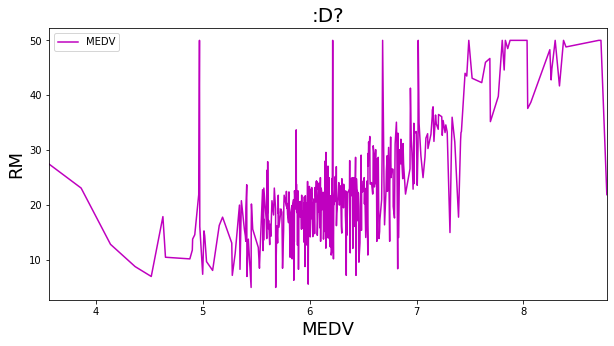

In [37]:
df.plot(color='m',figsize=(10,5))
plt.xlabel('MEDV', fontsize=18)
plt.ylabel('RM',fontsize=18)
plt.title(':D?', Fontsize=20)
plt.show()

In [38]:
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

SyntaxError: invalid syntax (<ipython-input-38-ca7d7b5d0626>, line 1)

In [32]:
plt.figure(figsize=(20, 5))


# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


<Figure size 1440x360 with 0 Axes>

# Additional Question: 